 
* Author :Elizabeth Masai
*  TM:Asha Deen


## 1.Business Understanding

##  Project  Overview

In the world of telecommunications, keeping customers is just as important as acquiring new ones. For SyriaTel, a telecommunications company based in Syria,the cost of acquiring a new customer is six times higher than retaining an existing one . Therefore, understanding why customers leave, or "churn," is crucial for the company's financial well being.
This project therefore aims at helping SyriaTel tackle this challenge by building a classifier to predict whether a customer will soon stop doing business with the telecommunication company.


The  goal of this project is to find any predictable patterns in this data that might indicate a customer is about to churn.By identifying these patterns, this project can provide SyriaTel with insights that could help them improve their customer retention strategies. This will in the long run help SyriaTel save money and maintain a strong customer base.

## Challenges

The challenges faced by the telecom industry include very dimensional and incomplete customer data, the need for accurate churn prediction, and the ability to connect analytics to actionable outcomes.Previous studies however have shown promising results in using big data and machine learning techniques to improve customer loyalty prediction in the telecom industry, achieving high accuracy rates in gender and age prediction.

##  Problem Statement

SyriaTel, a telecommunications company, is facing the challenge of customer churn, where customers decide to end their subscription. This churn rate is currently at approximately 15%. The company wants to understand if there are any predictable patterns or factors that contribute to customer churn. By identifying these patterns, SyriaTel aims to develop strategies to reduce churn and retain more customers, ultimately improving their financial performance and well being.


## Objectives

1.Identify Predictive Patterns: Analyze the provided dataset from SyriaTel to identify patterns and factors that are associated with customer churn. This involves exploring various features such as call minutes, charges, customer service calls, and plan details to understand their impact on churn.

2.Build a Churn Prediction Model: Develop a binary classification model using machine learning techniques to predict whether a customer is likely to churn or not. The model should be trained on historical customer data and evaluated using appropriate metrics such as accuracy, precision, recall, and F1-score.

3.Provide Actionable Insights: Generate actionable insights and recommendations based on the analysis and model results. These insights should help SyriaTel make informed decisions and develop targeted strategies to reduce churn, such as improving customer service, offering personalized promotions, or enhancing plan features.




## Conclusion

SyriaTel, a telecommunications company, is interested in reducing customer churn to minimize financial losses and maximise on profits. By analyzing the provided dataset and building a churn prediction model, this project aims at identifying  patterns and factors that contribute to churn and provide actionable insights to help SyriaTel develop effective customer retention mechanisims.


## 2.Data Understanding

The dataset is sourced from Kaggle [here ](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset) provides insights about the customers whether they are in the process of terminating their subscriptions with SyrialTel,already terminated or not.
This dataset therefore helps in coming up with predictive models that will aid in mitigating financial losses.

In [2]:
#Import necessary libraries

# Data Handling and Visualization tools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Filter future Warnings
import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing tools
from sklearn.preprocessing import MinMaxScaler

# Model Training and Evaluation
from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import numpy as np
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, f1_score, precision_score


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from sklearn.pipeline import Pipeline

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

In [3]:
#from imblearn.over_sampling import SMOTE
#from imblearn.pipeline import Pipeline as ImPipeline

In [4]:
#Load data

df=pd.read_csv(r"C:\Users\USER\Documents\Moringa\SyriaTel-Customer-Churn-Project\bigml_59c28831336c6604c800002a.csv")
df.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [5]:
#Number of rows and columns
df.shape

(3333, 21)

In [6]:
#Number of Elements
df.size

69993

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset contains 3333 rows and 21 columns,four of the columns are objects,8 are integers, 8 are floats and 1 boolian.
The column indicated as "churn" serves as the target in this project while the rest are used as features.
The dataset includes features like call minutes, charges, customer service calls, and details about the plans customers are on.
This dataset enables us find information such as entries  on how long customers talked on the phone, how much they were charged, and how many times they called customer service.

In [8]:
#Statistical Summary(Numerical data only)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


In [9]:
#Function to replace white space in the column names and replacing it with underscore to make it python compliant
class SyriaTelData:
    def __init__(self, data):
        self.df = data

    def replace_column_whitespaces(self):
        # Replace whitespaces with underscores in column names
        self.df.columns = self.df.columns.str.replace(' ', '_')

    def print_data(self):
        print(self.df)


# Create an instance of the class with the loaded DataFrame
syria_tel_data = SyriaTelData(df)

# Print the data before replacing whitespaces
print("DataFrame before replacing whitespaces in column names:")
syria_tel_data.print_data()

# Replace whitespaces with underscores in column names
syria_tel_data.replace_column_whitespaces()

# Print the modified data
print("\nDataFrame after replacing whitespaces with underscores in column names:")
syria_tel_data.print_data()

DataFrame before replacing whitespaces in column names:
     state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0

In [10]:
#Separating Numerical and Categorical columns

class SyriaTelData:
    def __init__(self, data):
        self.df = data

    def get_column_types(self):
        numerical_cols = self.df.select_dtypes(include=['int64', 'float64']).columns
        categorical_cols = self.df.select_dtypes(include=['object']).columns
        return numerical_cols, categorical_cols

# Assuming you've already loaded the data into a DataFrame named 'df'
syria_tel_data = SyriaTelData(df)

# Get the numerical and categorical columns
numerical_cols, categorical_cols = syria_tel_data.get_column_types()

# Print the column types
print("Numerical columns:")
print(numerical_cols)
print("\nCategorical columns:")
print(categorical_cols)

Numerical columns:
Index(['account_length', 'area_code', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls'],
      dtype='object')

Categorical columns:
Index(['state', 'phone_number', 'international_plan', 'voice_mail_plan'], dtype='object')


## 3. Data Preparation

This stage entails checking for anomalies by analyzing the data to identify missing values,outliers and null values.


In [11]:
class DataCleaner:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def check_duplicates(self):
        duplicate_rows = self.dataframe.duplicated()
        if any(duplicate_rows):
            print("There are duplicates in the data.")
        else:
            print("There are no duplicates in the data.")

    def remove_duplicates(self):
        initial_shape = self.dataframe.shape
        self.dataframe = self.dataframe.drop_duplicates()
        final_shape = self.dataframe.shape
        print(f"Removed {initial_shape[0] - final_shape[0]} duplicates.")

In [12]:
cleaner = DataCleaner(df)
cleaner.check_duplicates()
cleaner.remove_duplicates()

There are no duplicates in the data.
Removed 0 duplicates.


In [13]:
#Checking for missing values
class DataProcessor:
    def __init__(self, df):
        self.df = df

    def check_null_values(self):
        null_count = self.df.isnull().sum()
        print("Null Values Count:")
        print(null_count)

# Create an instance of the DataProcessor class
processor = DataProcessor(df)

# Check for null values
processor.check_null_values()

Null Values Count:
state                     0
account_length            0
area_code                 0
phone_number              0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64


In [14]:
#Remove phone number column because it is not very useful in this prediction
class DataProcessor:
    def __init__(self, data):
        self.data = data

    def drop_column(self, column_name):
        self.data = self.data.drop(column_name, axis=1)

    def print_dataset(self):
        print(self.data)

# Usage
processor = DataProcessor(df)
processor.drop_column('phone_number')
processor.print_dataset()

     state  account_length  area_code international_plan voice_mail_plan  \
0       KS             128        415                 no             yes   
1       OH             107        415                 no             yes   
2       NJ             137        415                 no              no   
3       OH              84        408                yes              no   
4       OK              75        415                yes              no   
...    ...             ...        ...                ...             ...   
3328    AZ             192        415                 no             yes   
3329    WV              68        415                 no              no   
3330    RI              28        510                 no              no   
3331    CT             184        510                yes              no   
3332    TN              74        415                 no             yes   

      number_vmail_messages  total_day_minutes  total_day_calls  \
0                   

## Dealing with outliers

Outliers can be caused by variability in the data or maybe errors in the collection stage.They need to be looked at because they significantly affect analysis and modelling.

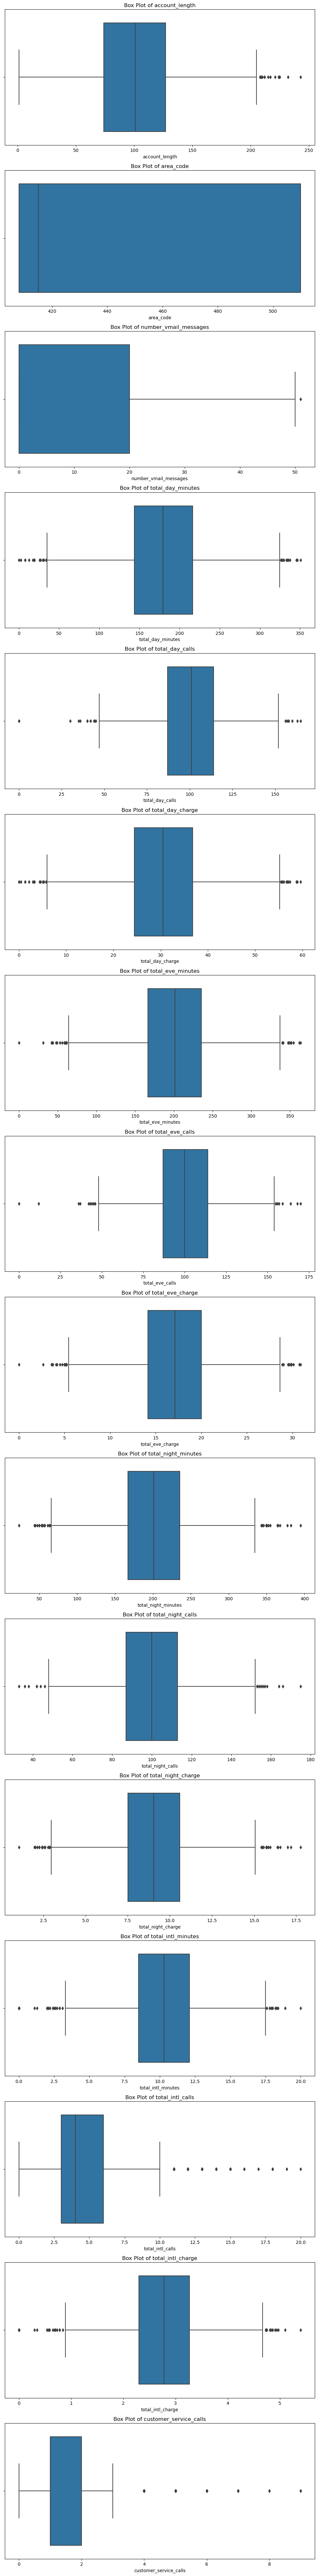

In [45]:
#Visuals for statistical summary
class SyriaTelDataAnalysis:
    def __init__(self, dataframe):
        self.df = dataframe

    def get_numerical_columns(self):
        """Retrieve numerical columns from the dataframe."""
        return self.df.select_dtypes(include=['number']).columns

    def plot_box_plots(self):
        """Plot box plots for each numerical column."""
        numeric_columns = self.get_numerical_columns()
        num_plots = len(numeric_columns)
        fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(10, 5 * num_plots))
        
        for i, column in enumerate(numeric_columns):
            sns.boxplot(data=self.df, x=column, ax=axes[i] if num_plots > 1 else axes)
            axes[i if num_plots > 1 else 0].set_title(f'Box Plot of {column}')
            axes[i if num_plots > 1 else 0].set_xlabel(column)
        
        plt.tight_layout()
        plt.show()

# Initialize the SyriaTelDataAnalysis class
analysis = SyriaTelDataAnalysis(df)

# Plot box plots for each numerical column
analysis.plot_box_plots()

From the box plots above,we can tell that box plots carry significant insights into the customer behavior and therefore all the data will be used for analysis and modelling because dropping them will distort the information in the data.

From the above findings,the data does not have null,any duplicates or outliers to be dropped.This therefore makes it ready for analysis.

## 4. Exploratory Data Analysis


This step helps in better understanding  of the data, identifying patterns, and testing various assumptions. Data visualization plays a key role in streamlining this process  making it easier to analyze and communicate the findings.




## Univariate Exploratory Data Analysis

Univariate analysis involves examining the distribution of single variables.With 'churn' being the target variable in this project,analysis is done to accertain how churn relates to the other predictor variables.

In [15]:
# Calculate the distribution of the 'churn' column
churn_distribution_summary = df['churn'].value_counts()

# Print the churn distribution summary
print("Churn Distribution Summary:")
print(churn_distribution_summary)

Churn Distribution Summary:
churn
False    2850
True      483
Name: count, dtype: int64


Since churn represents customers who have terminated their contract with SyriaTel,the above analyis shows 2850 of the customers are still working with SyriaTel,that is the false value,while 483 of them have terminated their contracts(True value).

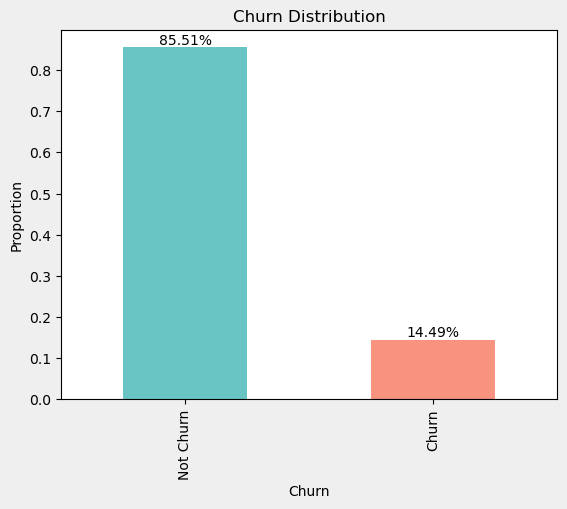

In [16]:
class SyriaTelData:
    def __init__(self, data):
        self.df = data

    def plot_churn_distribution(self):
        # Set the background color
        plt.figure(facecolor='#EFEFEF')

        # Calculate churn distribution
        churn_distribution = self.df['churn'].value_counts(normalize=True)

        # Plot churn distribution
        churn_distribution.plot(kind='bar', color=['#68C5C3', '#F7937F'])

        # Annotate bars with representative values
        for i, value in enumerate(churn_distribution):
            plt.text(i, value, f"{value:.2%}", ha='center', va='bottom')

        # Set plot title and labels
        plt.title('Churn Distribution')
        plt.xlabel('Churn')
        plt.ylabel('Proportion')
        plt.xticks([0, 1], ['Not Churn', 'Churn'])

        # Show plot
        plt.show()

# Assuming you've already loaded the data into a DataFrame named 'df'
syria_tel_data = SyriaTelData(df)

# Plot the churn distribution
syria_tel_data.plot_churn_distribution()

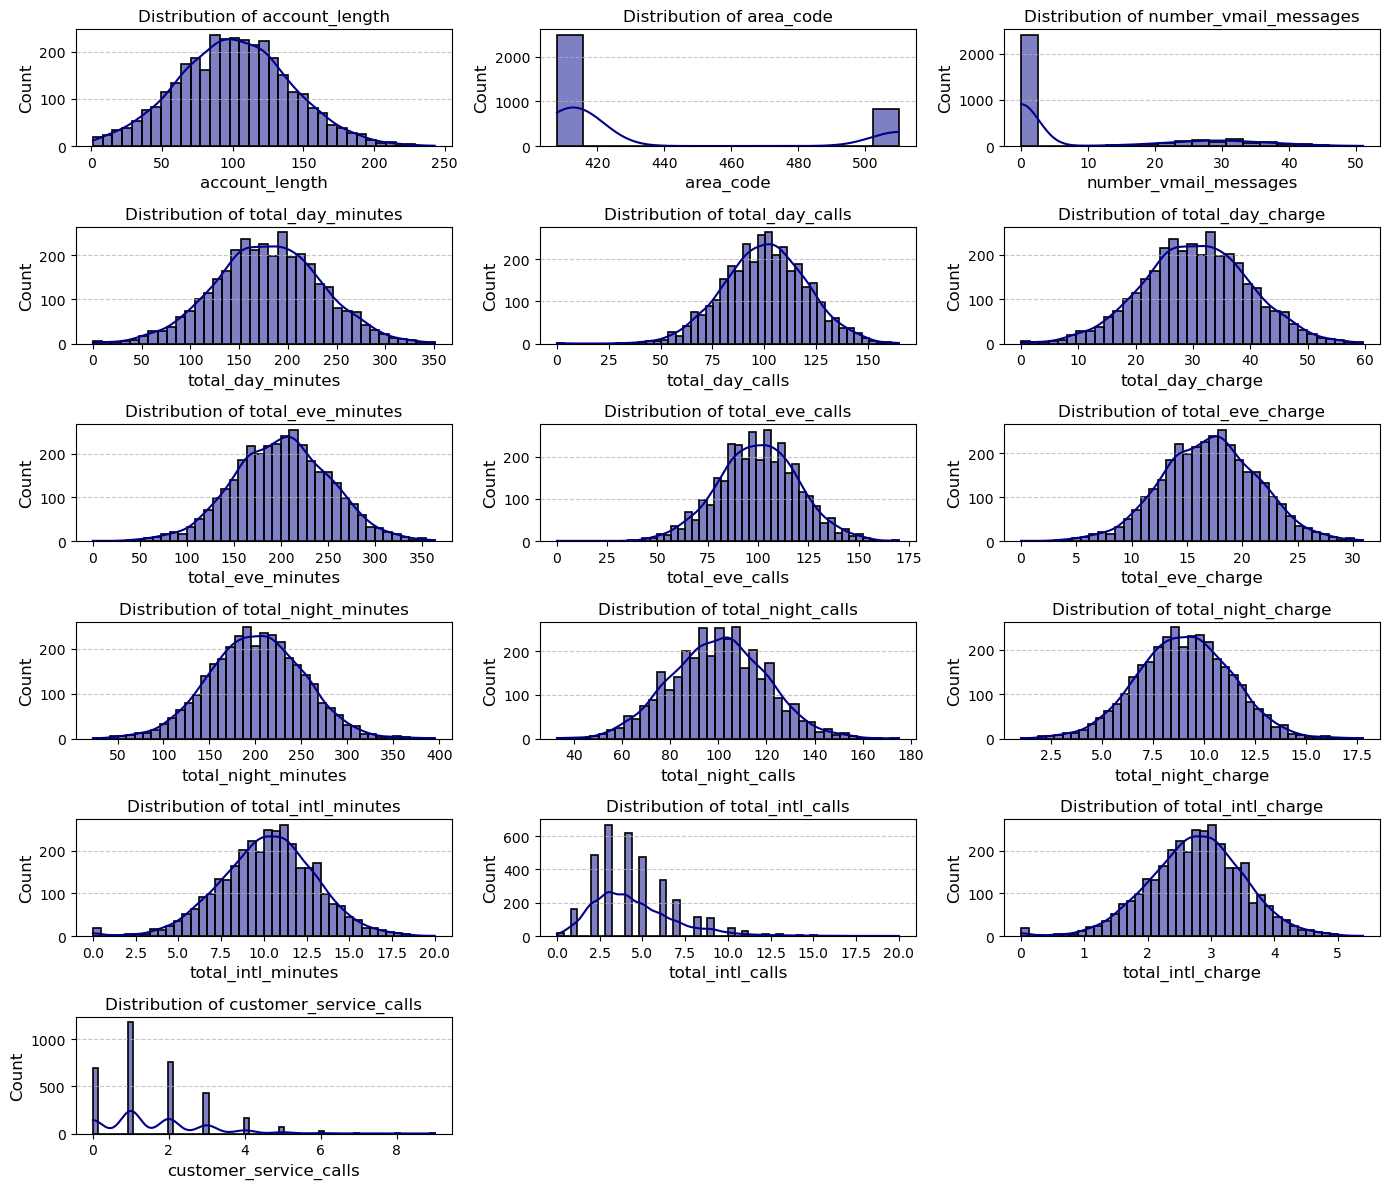

In [22]:
#Numerical Feaure Distribution
class SyriaTelData:
    def __init__(self, data):
        self.df = data

    def get_numeric_features(self):
        return self.df.select_dtypes(include='number').columns.tolist()

    def plot_numeric_features(self):
        numeric_features = self.get_numeric_features()
        rows = (len(numeric_features) - 1) // 3 + 1
        cols = min(3, len(numeric_features))
        fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(14, 12))
        axes = axes.flatten()
        for ax, feature in zip(axes, numeric_features):
            sns.histplot(self.df[feature], kde=True, ax=ax, color='darkblue', edgecolor='black', linewidth=1.2)
            ax.set_title(f'Distribution of {feature}', fontsize=12)
            ax.set_xlabel(feature, fontsize=12)
            ax.set_ylabel("Count", fontsize=12)
            ax.grid(axis='y', linestyle='--', alpha=0.7)
        for ax in axes[len(numeric_features):]:
            fig.delaxes(ax)
        fig.tight_layout()
        plt.show()

# Assuming you've already loaded the data into a DataFrame named 'df'
syria_tel_data = SyriaTelData(df)

# Plot the numeric features
syria_tel_data.plot_numeric_features()

From the above plots,we can tell that,account length, total day minutes, total day calls, total eve minutes, total eve calls, total day charge, total eve charge, total night minutes, total night calls, total night charge, total intl minutes and total intl charge follow a fairly normal distribution.

Distribution of customer service calls,area code and number of vmail messages is not normal.

## Categorical Feature Distribution

This involves state distribution ,international_plan distribution and voice_mail_plan distibution.

In [42]:
#Value count for customers with international plan
df['international_plan'].value_counts()

international_plan
no     3010
yes     323
Name: count, dtype: int64

In [43]:
#customers with voice mail plan
df['voice_mail_plan'].value_counts()

voice_mail_plan
no     2411
yes     922
Name: count, dtype: int64

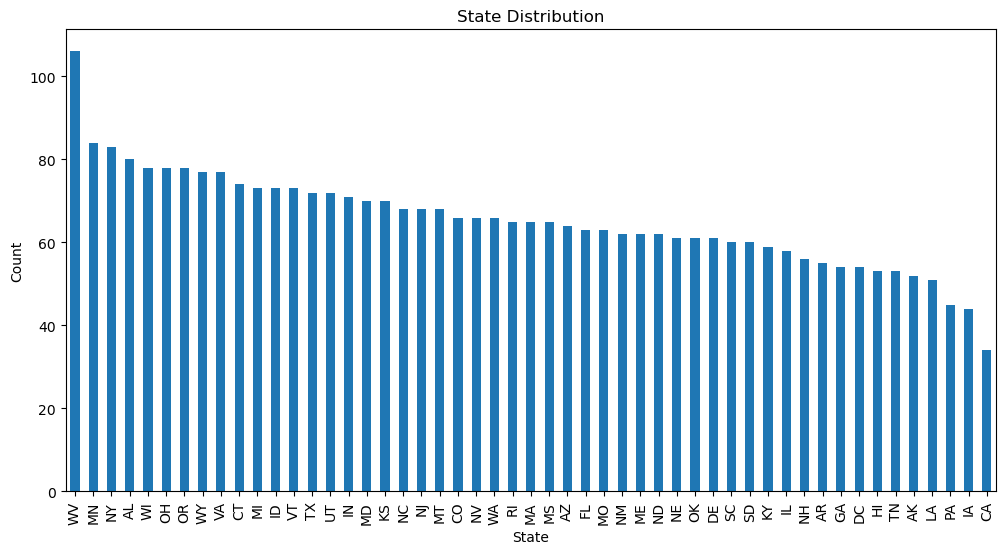

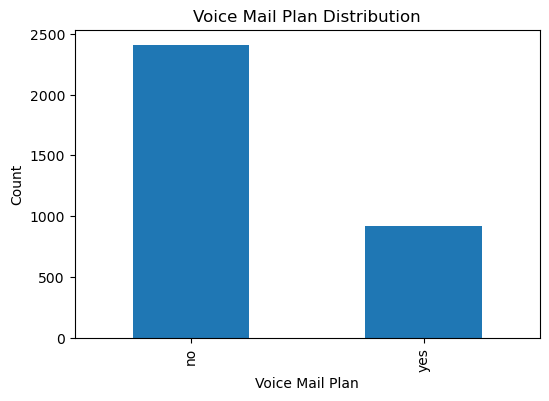

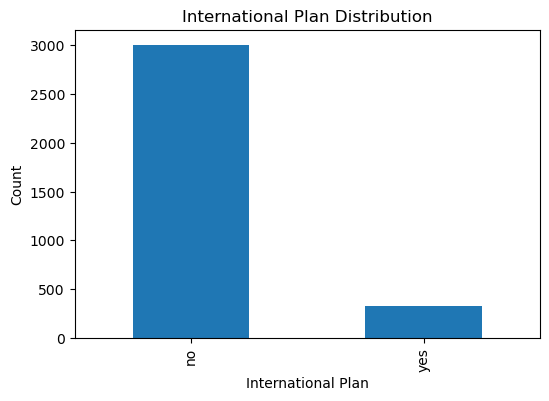

In [37]:
#Plots for categorical columns
class DataVisualizer:
    def __init__(self, dataframe):
        self.df = dataframe

    def plot_categorical_distribution(self, column_name, title, xlabel, ylabel, figsize=(6, 4)):
        plt.figure(figsize=figsize)
        self.df[column_name].value_counts().plot(kind='bar')
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()


# Initialize the DataVisualizer class
visualizer = DataVisualizer(df)

# Plot the distributions
visualizer.plot_categorical_distribution(
    column_name='state',
    title='State Distribution',
    xlabel='State',
    ylabel='Count',
    figsize=(12, 6)
)

visualizer.plot_categorical_distribution(
    column_name='voice_mail_plan',
    title='Voice Mail Plan Distribution',
    xlabel='Voice Mail Plan',
    ylabel='Count'
)

visualizer.plot_categorical_distribution(
    column_name='international_plan',
    title='International Plan Distribution',
    xlabel='International Plan',
    ylabel='Count')

From  the above visuals, we start from  state distribution where,most of the customers subscribing to SyriaTel come from West Virginia, Minnesota,New York,Alibama and Wisconsin.

On the voice mail plan,we can see that only 922 out of 3333 customers have the voicemail plan.

On the International plan,only 323 of the customers have an international plan,which is a very small percentage.

## Bivariate Data Analysis

This entails analysing the relatioship between two variables to understand the relatiosnhip between them.

- **State vs. Churn**: inspects to see if the churn rates vary significantly across different states. This can reveal geographic patterns in customer behavior.

- **Voice Mail Plan vs. Churn**: determines if having a voice mail plan affects the likelihood of a customer churning. This can indicate if certain services are retaining customers better or not
- **International Plan vs. Churn**: Checks to find out  if customers with an international plan are more or less likely to churn. This can help in understanding if offering international plans is beneficial in reducing churn.


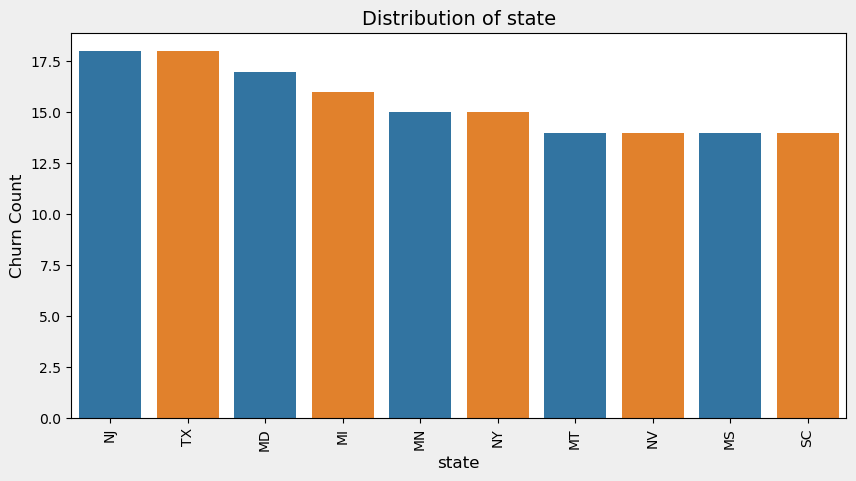

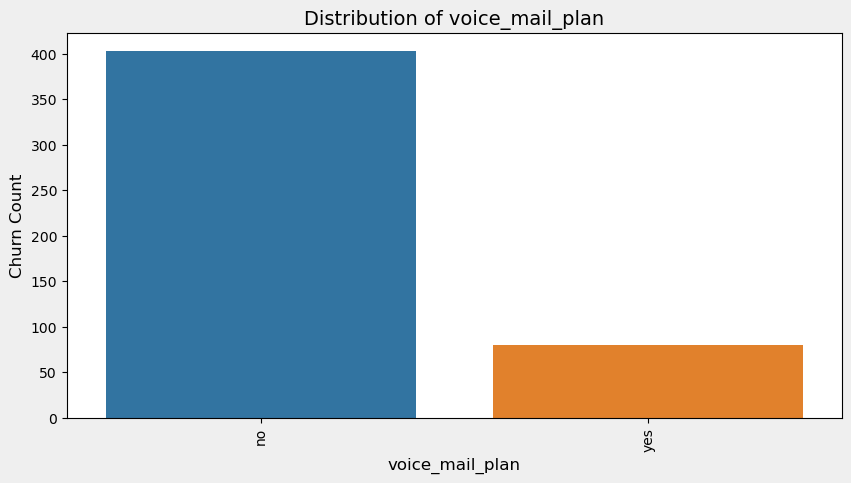

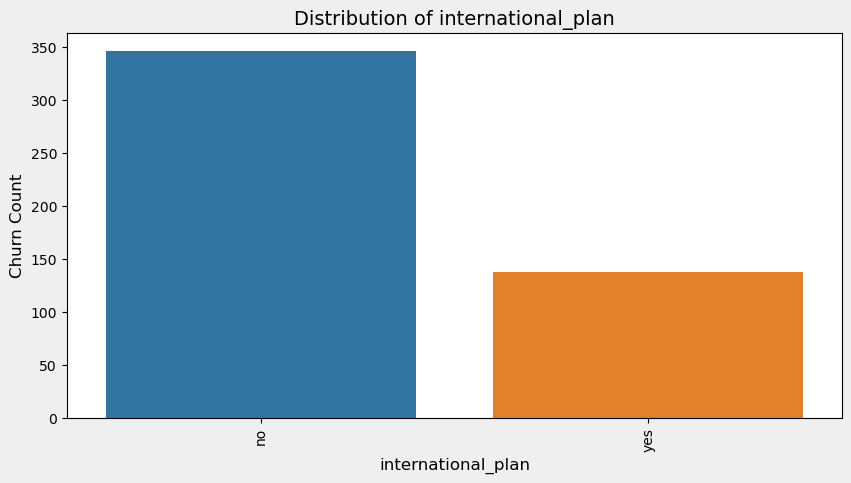

In [52]:
class SyriaTelDataAnalysis:
    def __init__(self, dataframe):
        self.df = dataframe
        self.df['churn'] = self.df['churn'].astype(bool)  # Ensure 'churn' is of boolean type

    def plot_categorical_distribution(self, feature):
        """
        Plots the distribution of a categorical feature in the given DataFrame based on churn rate.
        """
        # Create figure and set its background color
        fig = plt.figure(figsize=(10, 5), facecolor='#EFEFEF')

        # Calculate the sum of churn for each category of the feature and sort in descending order
        churn_counts = self.df.groupby(feature)["churn"].sum().sort_values(ascending=False)

        # Get the top 10 categories with the highest churn counts
        top_10_categories = churn_counts.head(10).index.tolist()

        # Create a bar plot of the feature, colored by churn
        sns.barplot(x=top_10_categories, y=churn_counts.loc[top_10_categories],
                    palette=['#1f77b4' if x % 2 == 0 else '#ff7f0e' for x in range(len(top_10_categories))])

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=90)

        # Set the title and labels
        plt.title(f'Distribution of {feature}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Churn Count', fontsize=12)

        # Show the plot
        plt.show()


# Initialize the SyriaTelDataAnalysis class
analysis = SyriaTelDataAnalysis(df)

# Plot bivariate analysis for 'state', 'voice mail plan', and 'international plan' against 'churn'
analysis.plot_categorical_distribution('state')
analysis.plot_categorical_distribution('voice_mail_plan')
analysis.plot_categorical_distribution('international_plan')

- The first visual of state distribution indicates that churn rates vary significantly by state, with New Jersy and TeXas having notably higher rates.

- The second visual shows a strong relationship between having a voice mail plan and lower churn rates. Customers with a voice mail plan are less likely to churn, suggesting that this service adds value and contributes to customer retention.

-  The third  visual indicates a clear relationship between having an international plan and lower churn rates. Customers with an international plan are less likely to churn, suggesting that this service adds value and contributes to customer retention. 

## Multivariate Analysis
Multivariate analysis  helps us identify complex patterns and correlations between various features such as total day minutes, total day calls, total day charge, voice mail plan, international plan, and churn. This in return helps us in  understanding  and providing valuable insights for decision-making and strategy development while trying to solve the churn problem.
    

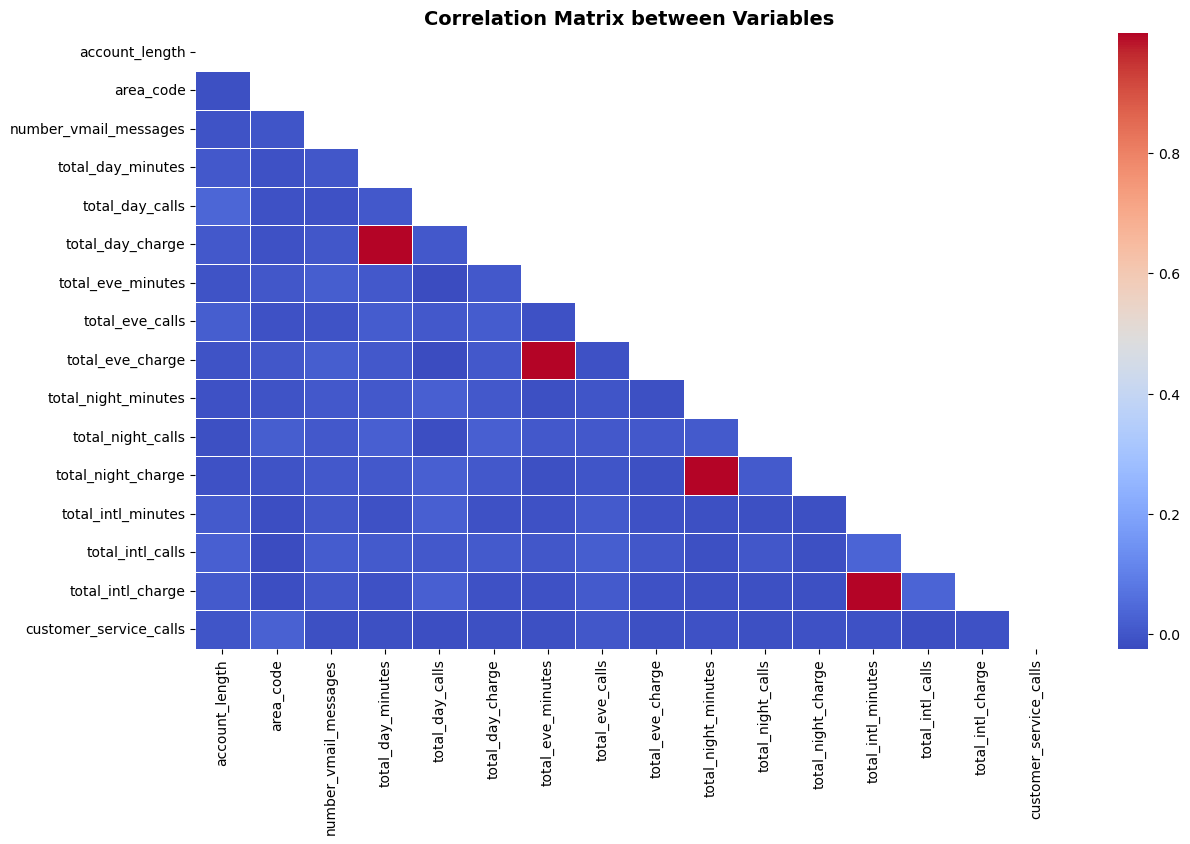

In [66]:
class SyriaTelDataAnalysis:
    def __init__(self, dataframe):
        self.df = dataframe
        self.df['churn'] = self.df['churn'].astype(bool)  # Ensure 'churn' is of boolean type

    def get_numerical_columns(self):
        """Retrieve numerical columns from the dataframe."""
        return self.df.select_dtypes(include=['number']).columns

    def plot_correlation_matrix(self):
        """Plot a heatmap of the correlation matrix of numerical columns."""
        # Select only numerical columns
        numerical_columns = self.get_numerical_columns()
        df_numeric = self.df[numerical_columns]

        # Calculate the correlation matrix
        corr_matrix = df_numeric.corr()

        # Create a mask for the upper triangle
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

        # Set the figure size
        plt.figure(figsize=(14, 8))

        # Generate the correlation heatmap for the lower half
        sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

        # Set the title of the plot
        plt.title('Correlation Matrix between Variables', fontsize=14, fontweight='bold')

        # Display the plot
        plt.show()

# Initialize the SyriaTelDataAnalysis class
analysis = SyriaTelDataAnalysis(df)

# Plot the correlation matrix
analysis.plot_correlation_matrix()

From the heat map above, features that exhibit high correlation are total day charge and total day minutes,total evening charge and total evening minutes,total night charge and total night minutes,total international charges and total international minutes.